# Bank Heist Project Submission

**Description**

Given a list of bank, their locations, the amount of money each bank holds, and the amount of time it would take to rob each bank; apply your knowledge of algorithms to make as much profit as possible!

**Design a solution that finds a list of banks that when robbed will maximize your profit, while following these constraints:**

- Total time for robbery cannot exceed **24 hours**. This includes travel time between banks + time it takes to rob the bank + time it takes to get to the helicopter escape zone

- Travel speed from one bank to another is **30 km/h**
    - Use the x and y coordinates to calculate the distance (in km) between banks
    - Use the distance and travel speed to calculate the amount of time it takes to get from one bank to another

- Solution must run under **3 minutes**

- You can start anywhere, but you have to end at the **helicopter escape zone** located at coordinates **(0,0)**

**Hints**

Most of the design paradigms you saw in class will work for this. Start with something that's easier (brute-force or greedy algorithm) and then work towards a better design once it works:

    - Divide-and-conquer
    - Brute Force
    - Greedy Algorithm
    - Dynamic Programming
    - Backtracking
    - Breadth-first & Depth-first search
Some we haven't covered:

    - Branch & Bound
    - Prune & Search
    
Because there are too many banks at each step, you will need to select only some candidates to explore.

If you find yourself using a nearest-neighbors type of approach, consider using a KD-Tree or a Ball Tree to speed it up.

There are good implementations of KD-Trees and nearest neighbours in scipy, sklearn and this [library](https://github.com/lmcinnes/pynndescent)

You can work your algorithm backwards (starting at the end and backing up to the starting point) or forwards (finding a starting point and looping until there is no time left). They will lead to different designs and results.

## Step 1: Imports

You can import the libraries you intend on using here or as you go along.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

## Step 2: Load Data

The `bank_data.csv` file is located in the **data** folder. Make sure you use the correct path.

In [2]:
df = pd.read_csv('data/bank_data.csv')

## Step 3: Data Exploration

Explore the data set to get a general understanding of what you're working with.

Feel free to add additional cells, and remove the ones you don't use.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            10000 non-null  int64  
 1   x_coordinate  10000 non-null  float64
 2   y_coordinate  10000 non-null  float64
 3   money         10000 non-null  int64  
 4   time (hr)     10000 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 390.8 KB


In [4]:
df.describe()

,id,x_coordinate,y_coordinate,money,time (hr)
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,-0.016431,0.037561,18430.320000,0.750245
std,2886.89568,2.889568,2.881789,25382.131155,0.433541
min,0.00000,-4.999292,-4.999928,100.000000,0.000032
25%,2499.75000,-2.513854,-2.415033,900.000000,0.373141
50%,4999.50000,-0.024904,0.010442,5800.000000,0.749218
75%,7499.25000,2.461754,2.540303,26900.000000,1.122812
max,9999.00000,4.999851,4.999626,102300.000000,1.499851


## Step 4: Solution 

Your solution must provide:

- A list of bank IDs in order that you rob them
- Total amount you were able to rob
- Time it took to rob + escape
- The execution time for your code to run

**Important: Your solution must respect all the constraints mentioned in the description.**

Feel free to add additional cells, and remove the ones you don't use.

In [5]:
start_time = time.time()

# I want to make the subsequent codes more concise, so I'm renaming the columns to shorter names.
df = df.rename(columns={'x_coordinate': 'x', 'y_coordinate': 'y', 'time (hr)': 'time_rob'})

In [6]:
# I'm adding a column to the df that shows the distance from the bank to the escape zone.
# It's calculated by taking the square root of the sum of the squares of the distances between the coordinates.
df['distance_escape'] = ((df['x'] - 0)**2 + (df['y'] - 0)**2)**0.5

# Calculate the time it takes to get from the bank to the escape zone based on the distance.
# The speed is 30 km/hour and the the time to the escape zone is the distance divided by the speed.
# Put the time it takes to get to the escape zone from the bank in a column called 'time_escape'
speed = 30
df['time_escape'] = df['distance_escape'] / speed

# Calculate the time that it takes to rob the place and get to the escape zone
# and store it in a column called 'total_time'
df['total_time'] = df['time_rob'] + df['time_escape']

# Give each bank a score that is the amount of money it has divided by total_time
# and store it in a column called 'score'
df['score'] = df['money'] / df['total_time']

# sort the values by score in descending order in a new df
sorted_df = df.sort_values(by='score', ascending=False).reset_index()

# I'm not sure why this gave me a new index column that had the exact same values as the ID column,
# so I dropped the column called index
sorted_df = sorted_df.drop('index', axis=1)

# Add a column to the sorted df to store the time it took to get from the previous bank to the current bank.
# We're starting from the bank at the top of the sorted df, so the distance to get to that bank is 0
sorted_df['time_to_current_bank'] = 0

In [7]:
# Iterate through the DataFrame to calculate the time_to_current_bank

for i in range(1, len(sorted_df)):
    # Use iloc and i as the index minus one to locate the last bank
    last_bank_coordinates = (sorted_df.iloc[i - 1]['x'], sorted_df.iloc[i - 1]['y'])
    
    # The distance to the last bank is the square root of the sum of the squares of the distances between the x and y coordinates
    # of the current bank and the last bank.
    distance_to_last_bank = ((sorted_df.iloc[i]['x'] - last_bank_coordinates[0])**2 + (sorted_df.iloc[i]['y'] - last_bank_coordinates[1])**2)**0.5
    
    # The time to get to the current bank is the distance between the last bank and the current bank divided by the speed
    time_to_current_bank = distance_to_last_bank / speed
    
    # Add a column to the sorted df with the time it took to get from the last bank to the current bank
    sorted_df.at[sorted_df.index[i], 'time_to_current_bank'] = time_to_current_bank

In [8]:
sorted_df['time_to_current_bank'].describe()

count    10000.000000
mean         0.171631
std          0.082486
min          0.000000
25%          0.107355
50%          0.169454
75%          0.231517
max          0.449136
Name: time_to_current_bank, dtype: float64

In [9]:
24/0.169454

141.6313571824802

In [10]:
# The average time it takes to get from one bank to the next in the sorted df is 141.6313571824802
# so, I'm assuming I won't be able to rob more than 150 banks in the sorted df

df_first_150 = sorted_df.head(150)
df_first_150.head()

,id,x,y,money,time_rob,distance_escape,time_escape,total_time,score,time_to_current_bank
0,5135,-0.404042,-0.433493,73900,0.009476,0.592592,0.019753,0.029229,2.528345e+06,0.000000
1,8562,0.928673,-0.846349,79100,0.008579,1.256479,0.041883,0.050462,1.567521e+06,0.046507
2,433,-1.585902,0.009662,85300,0.016018,1.585932,0.052864,0.068882,1.238350e+06,0.088543
3,9546,-1.810721,-0.795421,75100,0.000788,1.977728,0.065924,0.066712,1.125730e+06,0.027863
4,6104,-0.943787,1.194650,94100,0.047608,1.522472,0.050749,0.098357,9.567229e+05,0.072357


Last bank robbed: 6528.0, Time to get to escape zone: 0.10789081425979515
Total money stolen: 8241300.0
Total time spent: 23.725663640940876
Number of banks robbed: 116
Robbed banks: [5135.0, 8562.0, 433.0, 9546.0, 6104.0, 9653.0, 5933.0, 1455.0, 1372.0, 5719.0, 557.0, 7544.0, 6254.0, 951.0, 6097.0, 3613.0, 5356.0, 8525.0, 8287.0, 613.0, 3914.0, 7560.0, 7064.0, 5610.0, 4789.0, 4287.0, 487.0, 5971.0, 7595.0, 3516.0, 8375.0, 3605.0, 4696.0, 3193.0, 1447.0, 7494.0, 7531.0, 8125.0, 2.0, 9241.0, 9881.0, 4610.0, 8436.0, 8469.0, 781.0, 1966.0, 7087.0, 7265.0, 3026.0, 4906.0, 9378.0, 6317.0, 7583.0, 3340.0, 3971.0, 839.0, 6535.0, 2639.0, 58.0, 5155.0, 3466.0, 4499.0, 6478.0, 9779.0, 1757.0, 7689.0, 5296.0, 5622.0, 6759.0, 7074.0, 5562.0, 3005.0, 8690.0, 1844.0, 6375.0, 865.0, 6216.0, 4422.0, 7772.0, 517.0, 670.0, 2346.0, 4234.0, 3297.0, 7665.0, 1684.0, 6740.0, 5563.0, 2458.0, 1976.0, 3798.0, 6281.0, 2331.0, 9049.0, 359.0, 8355.0, 2190.0, 6468.0, 9804.0, 2243.0, 9880.0, 7907.0, 5381.0, 4492.0, 

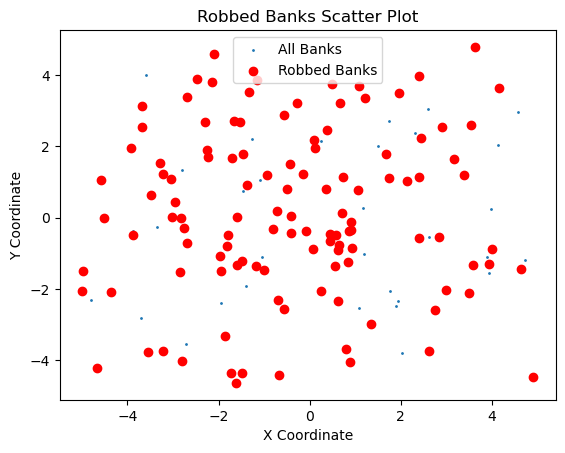

Elapsed time: 8111.684084177017 seconds


In [13]:
# Greedy algorithm:

# Initialize an empty list to keep track of bank IDs
robbed_banks = []

def rob_banks(df, M):
    '''
    A greedy algorithm that appends all the banks
    from the dataframe in sequential order
    until there's no more time left
    '''
    # Initialize variables
    total_money = 0
    time_elapsed = 0
    
    # A for loop goes through the rows of the data frame
    for i in range(len(df)):
        row = df.iloc[i]
        
        # Check if going to the next bank exceeds the allowed time.
        # If the amount of time that has already elapsed plus the time it took to get to the current bank,
        # plus the time to it will take to get to the escape zone is greater than the maximum allowed time,
        # add the amount of time it takes to get to the escape zone from the current bank and break the loop.
        if time_elapsed + row['time_to_current_bank'] + row['time_rob'] + row['time_escape'] > M:
            last_bank_robbed = df.iloc[i-1]['id']
            time_to_escape = df.iloc[i-1]['time_escape']
            print(f'Last bank robbed: {last_bank_robbed}, Time to get to escape zone: {time_to_escape}')
            time_elapsed += time_to_escape
            break
            
        # Add the bank to the list of robbed banks
        robbed_banks.append(row['id'])
    
        # Update total money and time
        total_money += row['money']
        time_elapsed += row['time_rob'] + row['time_to_current_bank']
        
    print(f'Total money stolen: {total_money}')
    print(f'Total time spent: {time_elapsed}')
    print(f'Number of banks robbed: {len(robbed_banks)}')
    print(f'Robbed banks: {robbed_banks}')
    robbed_coordinates = df.loc[df['id'].isin(robbed_banks), ['x', 'y']]
    
    # Plot the coordinates
    plt.scatter(df['x'], df['y'], label='All Banks', s=1)
    plt.scatter(robbed_coordinates['x'], robbed_coordinates['y'], color='red', label='Robbed Banks')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('Robbed Banks Scatter Plot')
    plt.legend()
    plt.show()

rob_banks(df_first_150, 24)

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Elapsed time: {elapsed_time} seconds")

### Briefly explain your solution/approach, and how it works.

The solution is a greedy algorithm that relies heavily on the datafame being sorted and filtered before running it. Five new columns are added: the distance of each bank from the escape zone, the time it takes to get from each bank to the escape zone, the total amount of time it takes to rob each bank and get to the escape zone, and a score given to each bank that is calculated by the amount of money the bank has, divided by the amount of time it takes to rob it and get back to the escape zone.The banks with the highest scores are the best banks to rob.

The dataframe is then sorted in descending order, starting with the bank that has the highest score. In the sorted dataframe, yet another column is added: the amount of time it takes to get from one bank to the next, in sequential order.

The greedy algorithm takes the sorted dataframe and simply takes all of the money it can until the time has run out, leaving just enough time to get to the escape zone. It goes through each row of the dataframe in sequential order and takes all of the money from the bank as long as there's still time left.

## Step 5: Summary and Results

1. What is the total amount of money you were able to collect?


I was able to collect $8,241,300.00

2. What are the IDs of the banks you robbed, in order? Use the list from your solution.

In [12]:
print(robbed_banks)

[5135.0, 8562.0, 433.0, 9546.0, 6104.0, 9653.0, 5933.0, 1455.0, 1372.0, 5719.0, 557.0, 7544.0, 6254.0, 951.0, 6097.0, 3613.0, 5356.0, 8525.0, 8287.0, 613.0, 3914.0, 7560.0, 7064.0, 5610.0, 4789.0, 4287.0, 487.0, 5971.0, 7595.0, 3516.0, 8375.0, 3605.0, 4696.0, 3193.0, 1447.0, 7494.0, 7531.0, 8125.0, 2.0, 9241.0, 9881.0, 4610.0, 8436.0, 8469.0, 781.0, 1966.0, 7087.0, 7265.0, 3026.0, 4906.0, 9378.0, 6317.0, 7583.0, 3340.0, 3971.0, 839.0, 6535.0, 2639.0, 58.0, 5155.0, 3466.0, 4499.0, 6478.0, 9779.0, 1757.0, 7689.0, 5296.0, 5622.0, 6759.0, 7074.0, 5562.0, 3005.0, 8690.0, 1844.0, 6375.0, 865.0, 6216.0, 4422.0, 7772.0, 517.0, 670.0, 2346.0, 4234.0, 3297.0, 7665.0, 1684.0, 6740.0, 5563.0, 2458.0, 1976.0, 3798.0, 6281.0, 2331.0, 9049.0, 359.0, 8355.0, 2190.0, 6468.0, 9804.0, 2243.0, 9880.0, 7907.0, 5381.0, 4492.0, 488.0, 2028.0, 2226.0, 8477.0, 4807.0, 1860.0, 9736.0, 7801.0, 4762.0, 4627.0, 8503.0, 6528.0]


3. How much time did it take to rob all the banks + escape? Does your solution meet the 24 hour constraint? 

It took 23.72192814520018 hours to rob all of the banks and escape. It meets the 24-hour constraint by keeping track of the amount of time it's taken to get from one bank to the next and rob it. Once there's not enough time left to get to the next bank, rob it, and get to the escape zone, the time that it takes to get from the current bank to the escape zone is added to the timer.

4. What is the execution time of your solution? Does your solution run in 3 minutes or less?

The total solution runs for 3.2403199672698975 seconds. I included the amount of time it takes to filter and sort the df, since that is a major part of the solution.

### A Quick Note

If I can add an extra note here, I'm somewhat disappointed because, as soon as I finished this solution, I started to better understand the concepts of dynamic programming. I think that dynamic programming would provide an optimal solution to the problem (it's my understanding that this is what it's designed to do); however, I haven't understood it well enough yet to be able to implement it yet.